# Working on Customer Churn Dataset

## Importing necessary libraries and packages:

In [140]:
#importing necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from imblearn.combine import SMOTEENN

In [2]:
#importing the dataset
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
#checking the data shape
data.shape

(7043, 21)

In [5]:
#checking the values of columns
data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
#checking data types
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
#descripttive statistics of dataset
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [9]:
#data count values
1000*data['Churn'].value_counts()/len(data['Churn'])

No     734.630129
Yes    265.369871
Name: Churn, dtype: float64

In [10]:
#Summary of data
data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

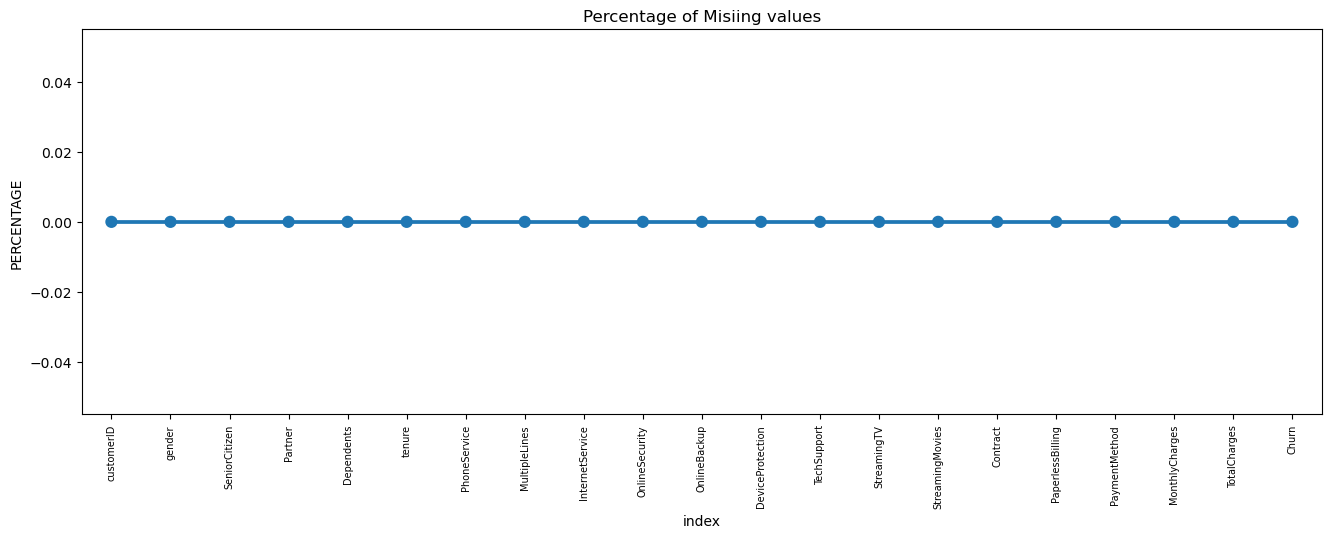

In [11]:
#checking the missing data in the dataset
missing = pd.DataFrame((data.isnull().sum())*100/data.shape[0]).reset_index()
plt.figure(figsize = (16,5))
ax = sns.pointplot('index', 0, data = missing)
plt.xticks(rotation = 90, fontsize = 7)
plt.title("Percentage of Misiing values")
plt.ylabel("PERCENTAGE")
plt.show

In [12]:
#creating a copy of the data
data_cpy = data.copy()

## Pre-processing of Data

In [13]:
data_cpy.TotalCharges = pd.to_numeric(data_cpy.TotalCharges, errors = 'coerce')
data_cpy.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [14]:
#there are 11 missing values in TotalChrages column

In [15]:
#as missing data can influence the end results, we would prefer to drop it

In [16]:
data_cpy.dropna(how = 'any', inplace = True)
data_cpy

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [17]:
# new shape 7032 * 21

In [18]:
#getting tenure max
print(data_cpy['tenure'].max())

72


In [19]:
#grouping tenure in bins of 12
data_cpy['tenure_group'] = pd.cut(data_cpy.tenure, range(1, 80, 12), right = False, labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)])
data_cpy['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

In [20]:
#no need for customer id
#removing the column of customer id
data_cpy.drop(columns = ['customerID', 'tenure'], axis = 1, inplace = True)
data_cpy.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


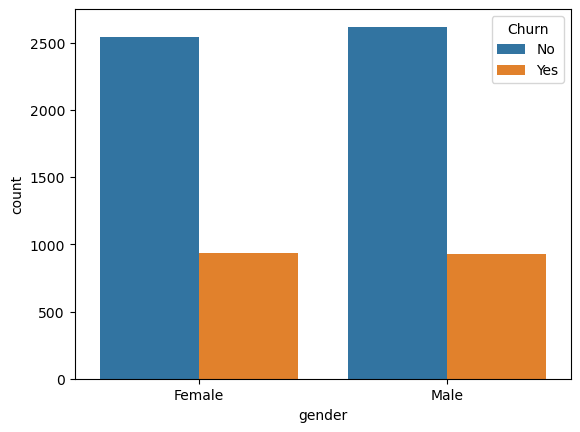

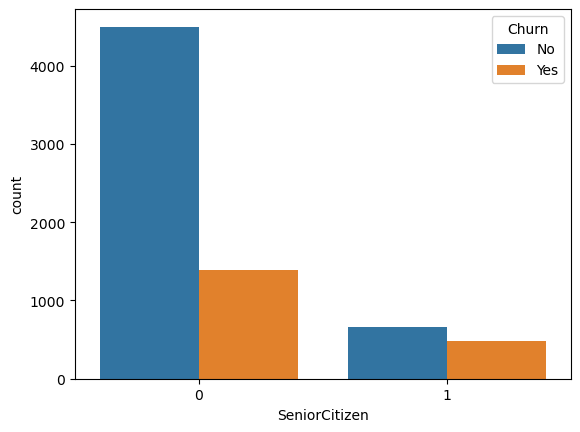

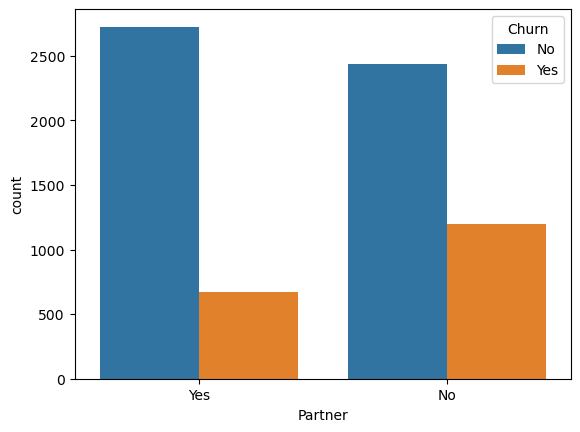

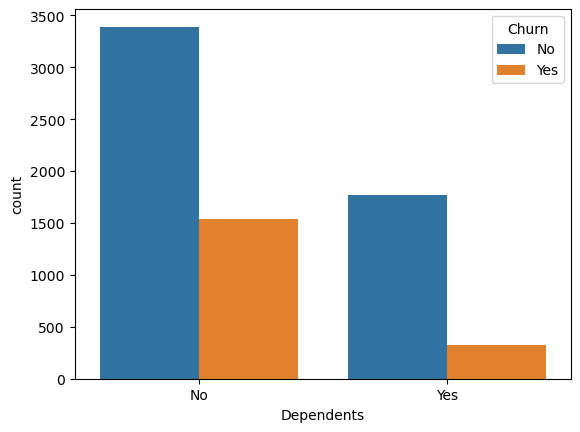

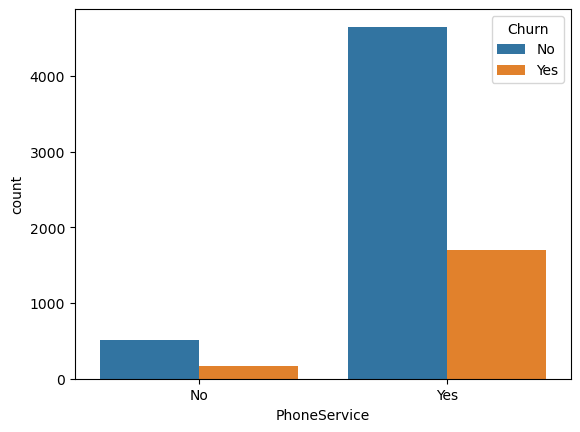

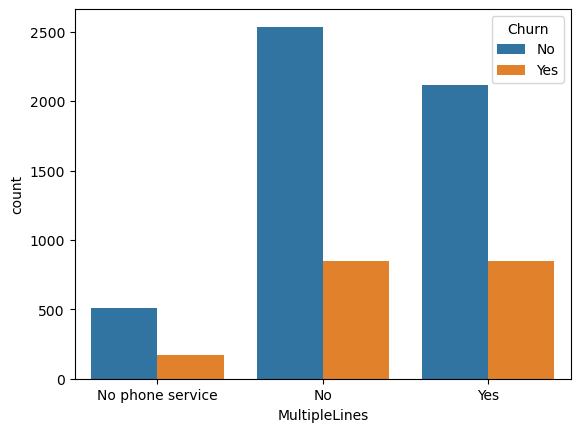

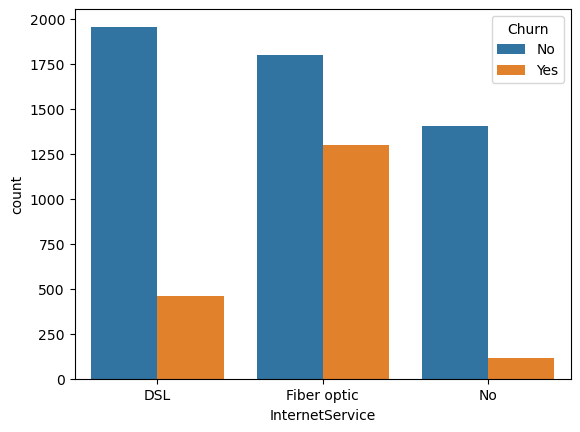

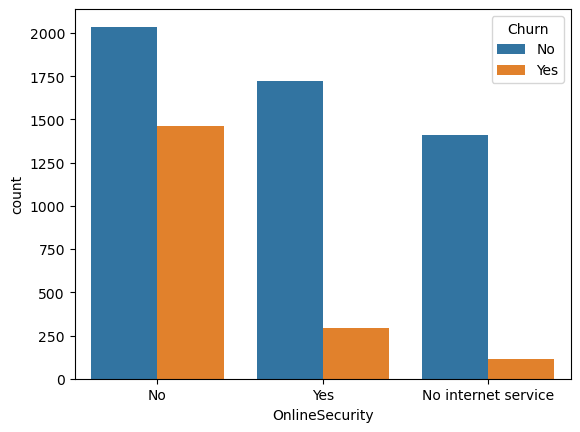

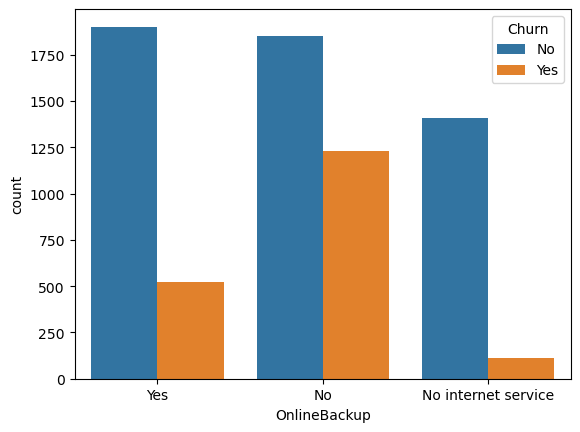

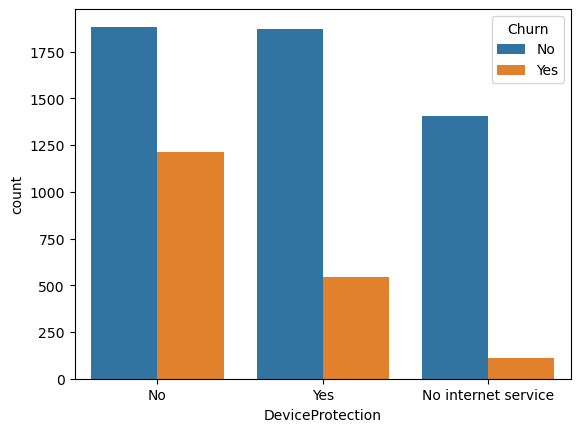

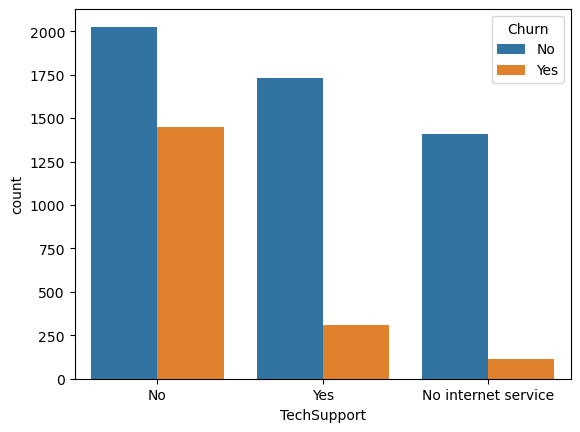

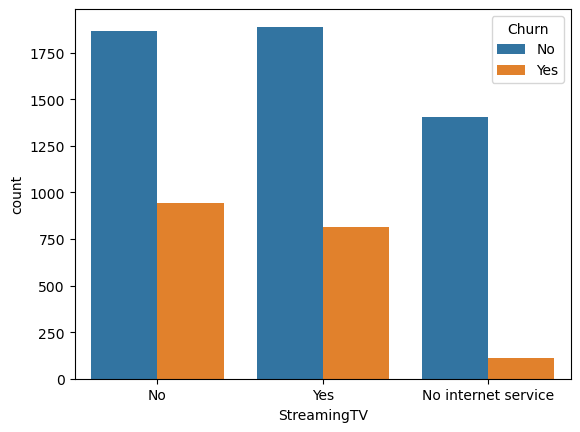

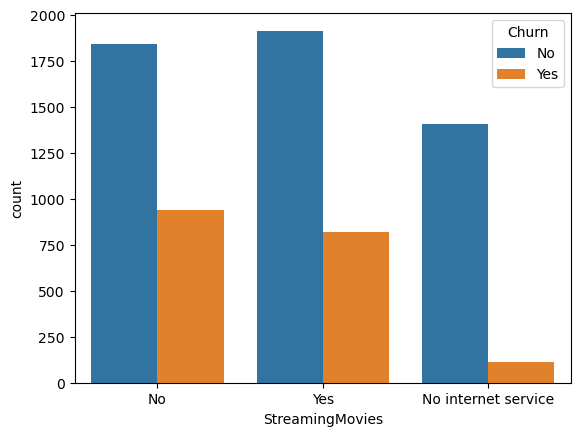

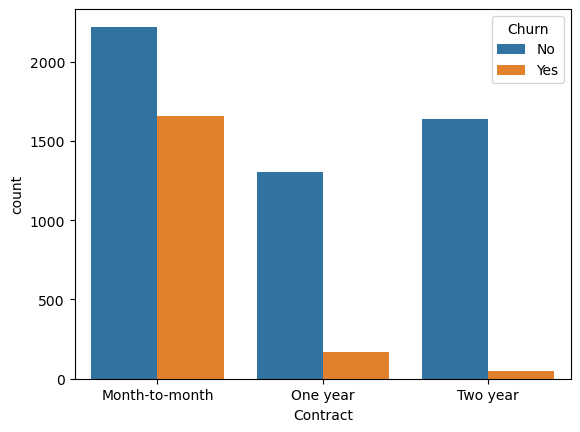

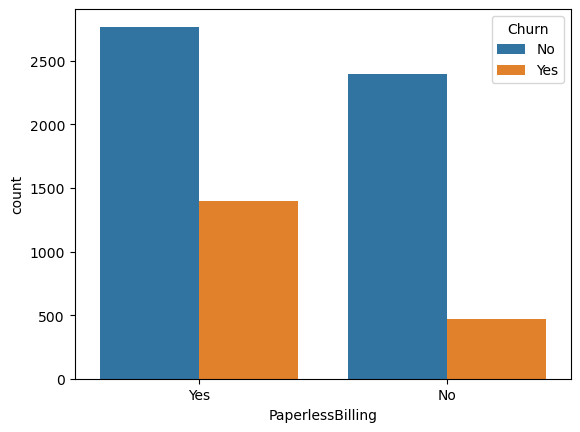

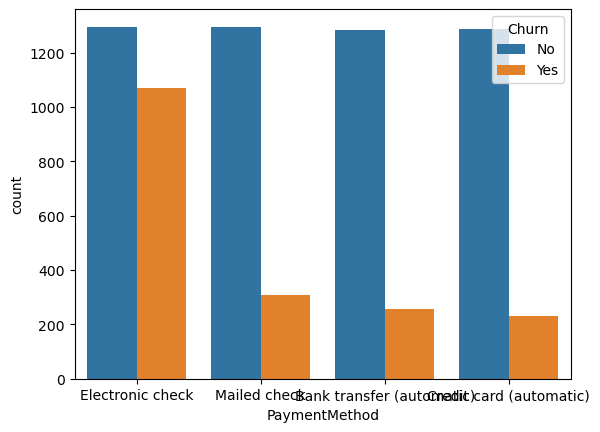

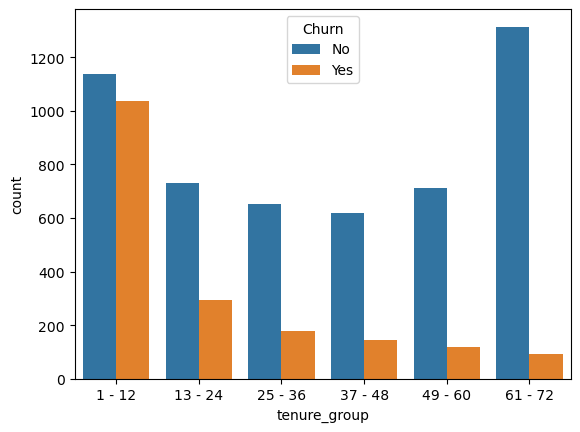

In [21]:
#deriving the churn data for each column
for i, predictor in enumerate(data_cpy.drop(columns = ['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data = data_cpy, x = predictor, hue = 'Churn')

In [22]:
#converting churn variable into target_variable Yes = 1, No = 0
data_cpy['Churn'] = np.where(data_cpy.Churn == 'Yes',1,0)
data_cpy.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


In [23]:
#converting categorical data to dummies
data_dum = pd.get_dummies(data_cpy)
data_dum.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [24]:
#relationship between MonthlyCharges and TotalCharges

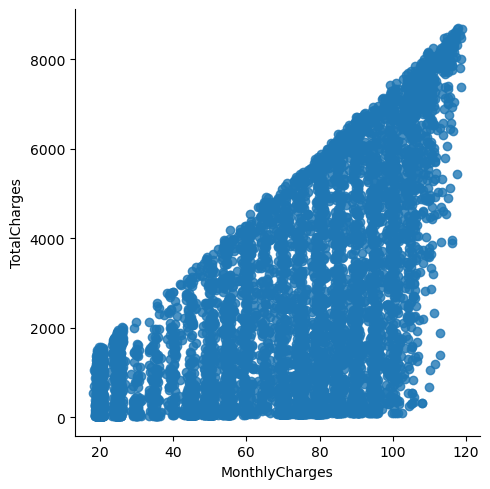

In [25]:
sns.lmplot(data = data_dum, x = 'MonthlyCharges', y = 'TotalCharges', fit_reg = False)

In [26]:
#churn by MonthlyCharges and TotalCharges

Text(0.5, 1.0, 'Monthly Charges by Churn')

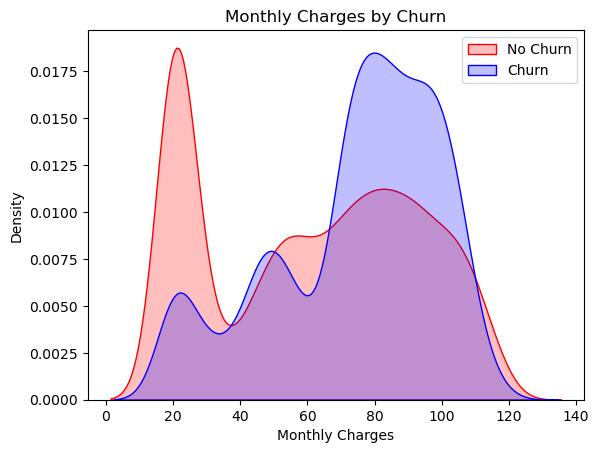

In [27]:
Mth = sns.kdeplot(data_dum.MonthlyCharges[(data_dum["Churn"] == 0)], color = "Red", shade = True)
Mth = sns.kdeplot(data_dum.MonthlyCharges[(data_dum["Churn"] == 1)], ax = Mth, color = "Blue", shade = True)
Mth.legend(["No Churn", "Churn"], loc = 'upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly Charges by Churn')


Text(0.5, 1.0, 'Total Charges by Churn')

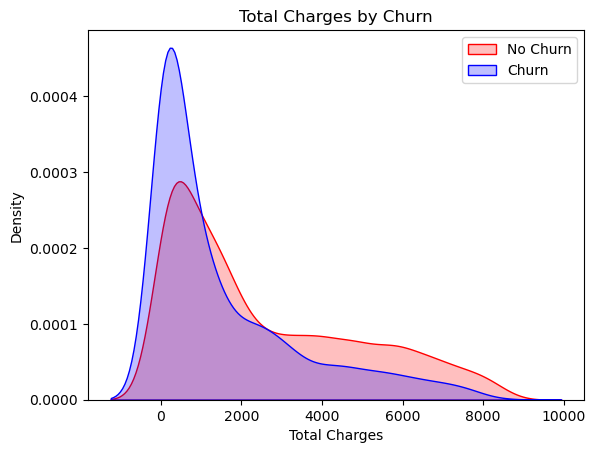

In [28]:
tot = sns.kdeplot(data_dum.TotalCharges[(data_dum["Churn"] == 0)], color = "Red", shade = True)
tot = sns.kdeplot(data_dum.TotalCharges[(data_dum["Churn"] == 1)], ax=tot, color = "Blue", shade = True)
tot.legend(["No Churn", "Churn"], loc = 'upper right')
tot.set_ylabel('Density')
tot.set_xlabel('Total Charges')
tot.set_title('Total Charges by Churn')

In [29]:
#Churn is high for Low Total Charges and high Monthly Charges

<AxesSubplot:>

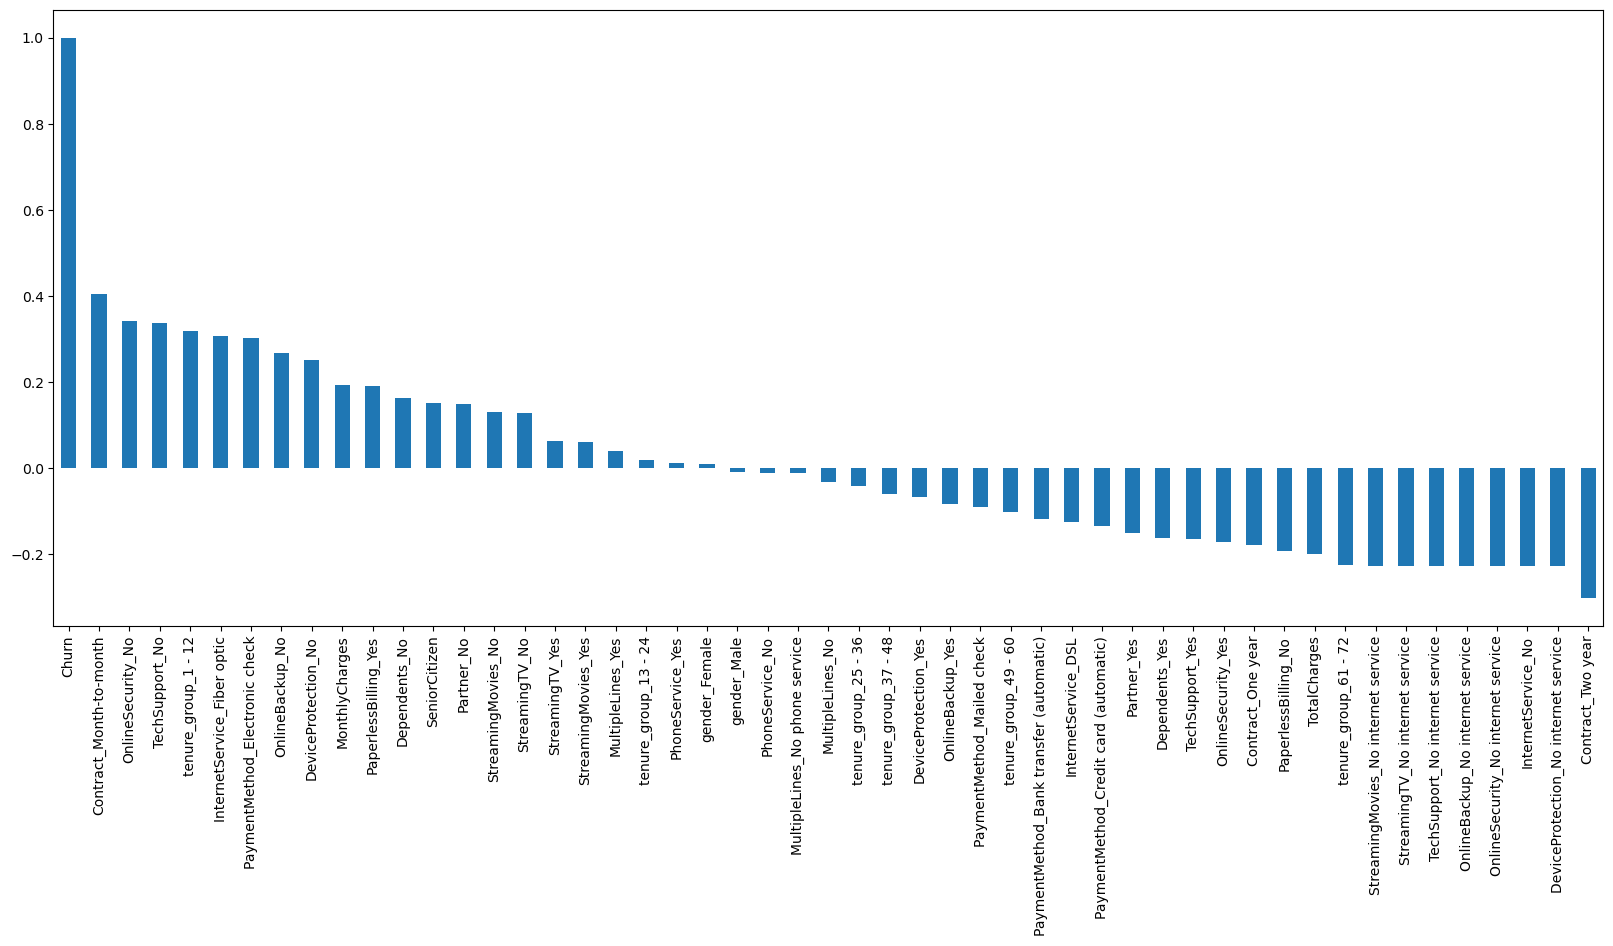

In [30]:
#Correlation of all predictors with Churn
plt.figure(figsize = (20, 8))
data_dum.corr()['Churn'].sort_values(ascending = False).plot(kind = 'bar')

In [31]:
data_dum.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [32]:
x = data_dum.drop('Churn', axis = 1)
y = data_dum['Churn']

In [33]:
#splitting dataset into test and train sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

## Decision Tree Classifier

In [34]:
model_dt = DecisionTreeClassifier(criterion = 'gini', random_state = 100, max_depth = 6, min_samples_leaf = 8)

In [35]:
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [36]:
y_pred = model_dt.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [37]:
print(classification_report(y_test, y_pred, labels = [0,1]))

              precision    recall  f1-score   support

           0       0.82      0.90      0.85      1010
           1       0.65      0.49      0.55       397

    accuracy                           0.78      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



In [39]:
print(confusion_matrix(y_test, y_pred))

[[904 106]
 [204 193]]


In [40]:
sm = SMOTEENN()
x_resampled, y_resampled = sm.fit_resample(x, y)

In [41]:
xr_train, xr_test, yr_train, yr_test = train_test_split(x_resampled, y_resampled, test_size = 0.2)

In [45]:
model_dt_sm = DecisionTreeClassifier(criterion = 'gini', random_state = 100, max_depth = 6, min_samples_leaf = 8)

In [47]:
model_dt_sm.fit(xr_train, yr_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [48]:
y_pred_sm = model_dt_sm.predict(xr_test)

In [50]:
print(classification_report(yr_test, y_pred_sm, labels = [0,1]))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93       535
           1       0.92      0.96      0.94       646

    accuracy                           0.93      1181
   macro avg       0.94      0.93      0.93      1181
weighted avg       0.94      0.93      0.93      1181



In [51]:
print(confusion_matrix(yr_test, y_pred_sm))

[[484  51]
 [ 26 620]]


## Random Forest Classifier

In [56]:
model_rf = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 100, max_depth = 6, min_samples_leaf = 8)
model_rf.fit(x_train, y_train)
y_pred_rf = model_rf.predict(x_test)

In [57]:
print(classification_report(y_test, y_pred_rf, labels = [0,1]))

              precision    recall  f1-score   support

           0       0.80      0.94      0.86      1010
           1       0.72      0.41      0.52       397

    accuracy                           0.79      1407
   macro avg       0.76      0.67      0.69      1407
weighted avg       0.78      0.79      0.77      1407



In [60]:
sm = SMOTEENN()
x_resampled, y_resampled = sm.fit_resample(x, y)

In [61]:
xr_train, xr_test, yr_train, yr_test = train_test_split(x_resampled, y_resampled, test_size = 0.2)

In [62]:
model_rf_sm = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 100, max_depth = 6, min_samples_leaf = 8)
model_rf_sm.fit(xr_train, yr_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [64]:
y_pred_sm_rf = model_rf_sm.predict(xr_test)

In [65]:
print(classification_report(yr_test, y_pred_sm_rf, labels = [0,1]))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92       523
           1       0.91      0.98      0.94       642

    accuracy                           0.93      1165
   macro avg       0.94      0.93      0.93      1165
weighted avg       0.94      0.93      0.93      1165



In [69]:
print(confusion_matrix(yr_test, y_pred_sm_rf))

[[462  61]
 [ 15 627]]


## Linear Regression Model

In [101]:
model_lm = LogisticRegression(max_iter = 10000)
model_lm.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [102]:
y_pred_lm = model_lm.predict(x_test)

In [103]:
print(classification_report(y_test, y_pred_lm))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1010
           1       0.70      0.46      0.56       397

    accuracy                           0.79      1407
   macro avg       0.76      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [104]:
sm = SMOTEENN()
x_resampled, y_resampled = sm.fit_resample(x, y)

In [105]:
xr_train, xr_test, yr_train, yr_test = train_test_split(x_resampled, y_resampled, test_size = 0.2)

In [106]:
model_lm_sm = LogisticRegression(max_iter = 10000)
model_lm_sm.fit(xr_train, yr_train)

LogisticRegression(max_iter=10000)

In [107]:
y_pred_lm_sm = model_lm_sm.predict(xr_test)

In [108]:
print(classification_report(yr_test, y_pred_lm_sm))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       509
           1       0.96      0.94      0.95       667

    accuracy                           0.94      1176
   macro avg       0.94      0.94      0.94      1176
weighted avg       0.94      0.94      0.94      1176



In [109]:
print(confusion_matrix(yr_test, y_pred_lm_sm))

[[483  26]
 [ 43 624]]


## Support Vector Machines

In [119]:
model_sv = SVC(max_iter = 8000, random_state = 0)
model_sv.fit(x_train, y_train)

SVC(max_iter=8000, random_state=0)

In [120]:
y_pred_sv = model_sv.predict(x_test)

In [121]:
print(classification_report(y_test, y_pred_sv, labels = [0,1]))

              precision    recall  f1-score   support

           0       0.72      1.00      0.84      1010
           1       0.00      0.00      0.00       397

    accuracy                           0.72      1407
   macro avg       0.36      0.50      0.42      1407
weighted avg       0.52      0.72      0.60      1407



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [133]:
sm = SMOTEENN()
x_resampled, y_resampled = sm.fit_resample(x, y)

In [134]:
xr_train, xr_test, yr_train, yr_test = train_test_split(x_resampled, y_resampled, test_size = 0.2)

In [135]:
model_sv_sm = SVC(max_iter = 8000, random_state = 0)
model_sv_sm.fit(xr_train, yr_train)

SVC(max_iter=8000, random_state=0)

In [136]:
y_pred_sv_sm = model_sv_sm.predict(xr_test)

In [137]:
print(classification_report(yr_test, y_pred_sv_sm, labels = [0,1]))

              precision    recall  f1-score   support

           0       0.72      0.80      0.76       540
           1       0.81      0.73      0.76       618

    accuracy                           0.76      1158
   macro avg       0.76      0.76      0.76      1158
weighted avg       0.77      0.76      0.76      1158



In [139]:
print(confusion_matrix(yr_test, y_pred_sv_sm))

[[431 109]
 [168 450]]


## Conclusion

Best model to predict the customer churn data is the Random Forest Classifier Model as after smoothening the data we are getting the most precision from that model

Worst prediction model is the Support Vector Machine Model as even after smoothening the data we are not getting enough precision.